Name: Juan Carlos González Martínez		<br> 					
Student ID: 82122300079			<br> 	
Course: Data Science<br> 
Final Assigment<br> 
**Predictive Model of a video game genre using Screenshots**<br> 
**Prototype Model**

In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import random
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
#Fixing random seed for reproducibility
SEED = 7
random.seed(SEED)
np.random.seed(SEED)

In [3]:
#Reading the dataset
df = pd.read_csv("dataset.csv")

In [4]:
df.head()

,ImagePath,Genre
0,data\action\AssasinsCreedIV\N172135_84.jpg,action
1,data\action\AssasinsCreedIV\N172136_85.jpg,action
2,data\action\AssasinsCreedIV\N172137_86.jpg,action
3,data\action\AssasinsCreedIV\N172138_87.jpg,action
4,data\action\AssasinsCreedIV\N172139_88.jpg,action


In [5]:
#Convert categorical feactures to numerical variables so the model can read it
df['Genre'] = LabelEncoder().fit_transform(df['Genre'])

#Check the conversion
df['Genre'].unique()

array([0, 1, 2, 3, 4])

In [6]:
#Read and save images as NumPy arrays (ndarrays)
image_data = []
target_size = (64, 64)  #Size we want all the images to be
for image_path in df['ImagePath']: 
    image = cv2.imread(image_path) #Read the image
    image = cv2.resize(image, target_size)  #Resize the image to the predefined size to avoid errors when creating X
    image_data.append(image) #Add the image to the list 

In [7]:
#Separate images and categories
X = np.array(image_data)
y = df['Genre']

In [8]:
#70 - 30 test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED, stratify = y) 
#We will use stratify so the proportion of values in produced sample is the same as the proportion of y

In [9]:
#Reshape the X data to a 2D array  
X_train = X_train.reshape((X_train.shape[0], -1)) #X_train.shape[0] returns the number of rows in X_train.
X_test = X_test.reshape((X_test.shape[0], -1)) #-1 indicates that the size of the current dimension will be inferred based on the length of the data in the array.

In [10]:
#Create model
p_model = RandomForestClassifier(criterion = 'gini', max_features = None, n_estimators = 20, verbose = 50, random_state = SEED)

#Fit the model on the training data
p_model.fit(X_train, y_train)

building tree 1 of 20
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed: 27.4min
building tree 2 of 20
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed: 58.6min
building tree 3 of 20
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed: 90.1min
building tree 4 of 20
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed: 123.9min
building tree 5 of 20
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed: 155.4min
building tree 6 of 20
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed: 188.0min
building tree 7 of 20
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed: 220.2min
building tree 8 of 20
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed: 252.9min
building tree 9 of 20
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed: 286.7min
building tree 10 of 20
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed: 318.9min
building tree 11 of 20
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed: 352.3min
building tree 12 of 20
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed: 3

RandomForestClassifier(max_features=None, n_estimators=20, random_state=7,
                       verbose=50)

In [11]:
#Perfomance check
predicted = p_model.predict(X_test)
print(classification_report(y_test, predicted))

[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  15 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  16 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Do

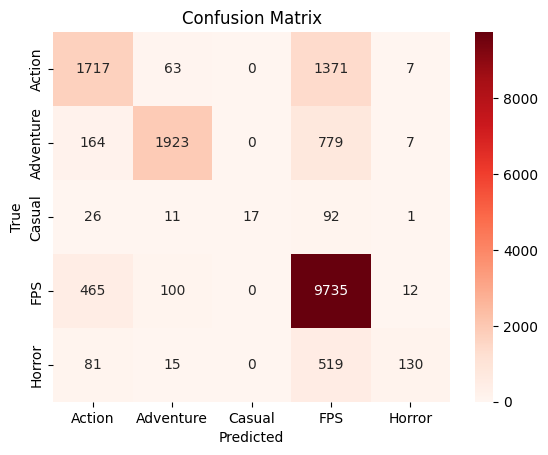

In [12]:
#Create confusion matrix from the 
c_matrix = confusion_matrix(y_test, predicted)

#Display the confusion matrix
sns.heatmap(c_matrix, annot = True, fmt = 'd', cmap = 'Reds',
            #We want to show the confusion matrix using a red color map and with the numerical values in each cell displayed as a integer.
            #(The numerical values will be shown thanks to annot = True)
            xticklabels = ['Action', 'Adventure', 'Casual', 'FPS', 'Horror'], #Replace default numerical labels in the axis with the names of the categories
            yticklabels = ['Action', 'Adventure', 'Casual', 'FPS', 'Horror'])

#Assign labels to the axis
plt.xlabel('Predicted') 
plt.ylabel('True')

#Assign title to the matrix and print it
plt.title('Confusion Matrix')
plt.show()